# EDA on Shaye Annotations

This notebook explores the dataset `shaye_annotations_3.1.26_extended.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Load Data

In [2]:
file_path = os.path.expanduser("~/soundbay/shaye_annotations_15.1.26_extended.csv")

if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")

Data loaded successfully.


## Overview

In [3]:
df.head()

,filename,call_length,begin_time,end_time,label,Species,annotations_filename,s3_path
0,7205.230309152955.wav,0.22181,142.3232,142.54501,1,AC,FlumeL_m_23.03.09_HALFHOUR_Sounds.selections_D...,s3://deepvoice-user-uploads/shayetudor@gmail.c...
1,7205.230309152955.wav,0.26214,238.9149,239.17704,1,AC,FlumeL_m_23.03.09_HALFHOUR_Sounds.selections_D...,s3://deepvoice-user-uploads/shayetudor@gmail.c...
2,7205.230309152955.wav,0.27223,231.7131,231.98533,1,AC,FlumeL_m_23.03.09_HALFHOUR_Sounds.selections_D...,s3://deepvoice-user-uploads/shayetudor@gmail.c...
3,7205.230309182955.wav,0.17140,57.8149,57.98630,1,AC,FlumeL_m_23.03.09_HALFHOUR_Sounds.selections_D...,s3://deepvoice-user-uploads/shayetudor@gmail.c...
4,7205.230309192956.wav,0.26214,196.3938,196.65594,1,AC,FlumeL_m_23.03.09_HALFHOUR_Sounds.selections_D...,s3://deepvoice-user-uploads/shayetudor@gmail.c...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7700 entries, 0 to 7699
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   filename              7696 non-null   object 
 1   call_length           7696 non-null   float64
 2   begin_time            7696 non-null   float64
 3   end_time              7696 non-null   float64
 4   label                 7700 non-null   int64  
 5   Species               1641 non-null   object 
 6   annotations_filename  7700 non-null   object 
 7   s3_path               7644 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 481.4+ KB


In [5]:
df.describe()

,call_length,begin_time,end_time,label
count,7696.000000,7696.000000,7696.000000,7700.000000
mean,0.837016,148.284642,149.121658,0.231429
std,0.794643,87.399646,87.392427,0.421773
min,0.000000,0.000000,0.618884,0.000000
25%,1.000000,72.000000,73.000000,0.000000
50%,1.000000,147.501700,148.000000,0.000000
75%,1.000000,224.000000,225.000000,0.000000
max,64.821800,300.148600,300.313000,1.000000


## Missing Values

In [6]:
missing_vals = df.isnull().sum()
missing_vals[missing_vals > 0]

filename          4
call_length       4
begin_time        4
end_time          4
Species        6059
s3_path          56
dtype: int64

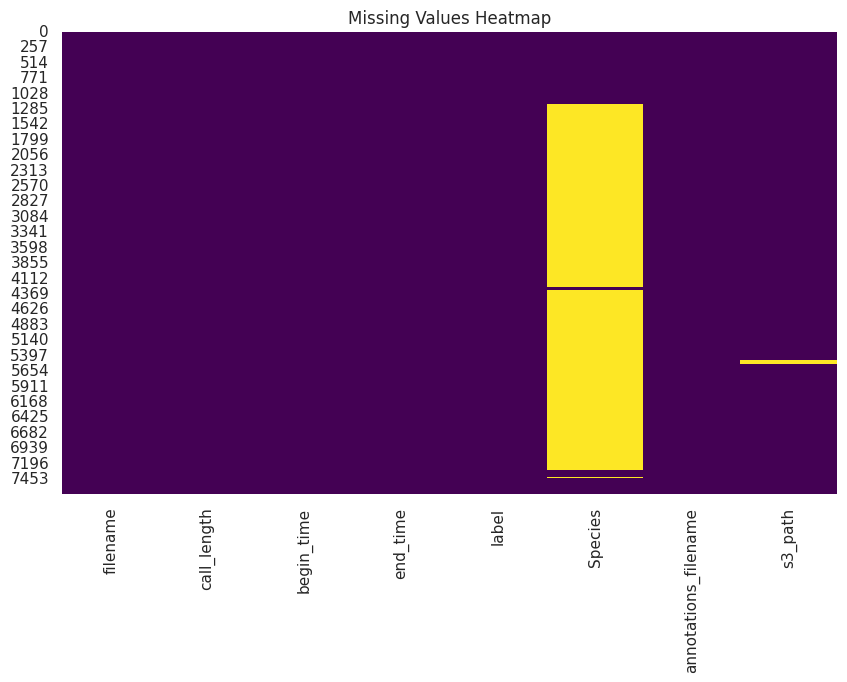

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Distributions

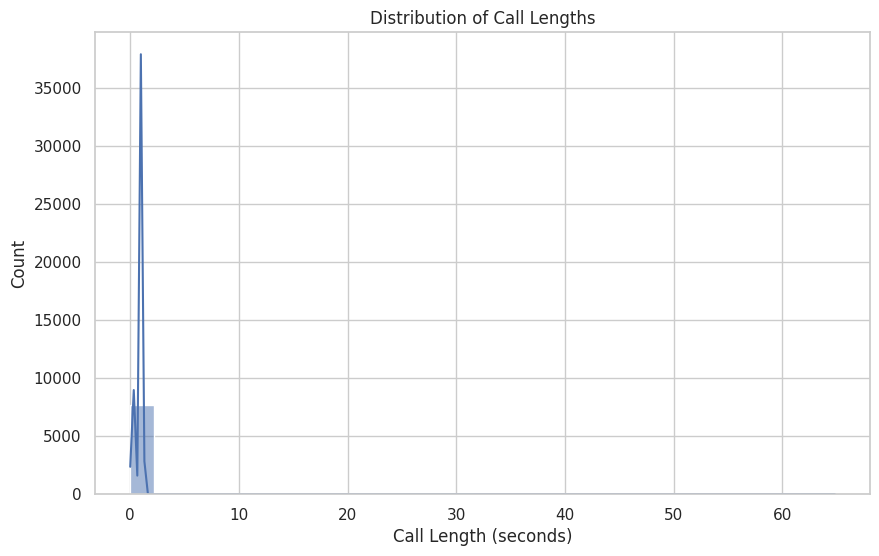

In [8]:
# Call Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['call_length'], kde=True, bins=30)
plt.title('Distribution of Call Lengths')
plt.xlabel('Call Length (seconds)')
plt.show()

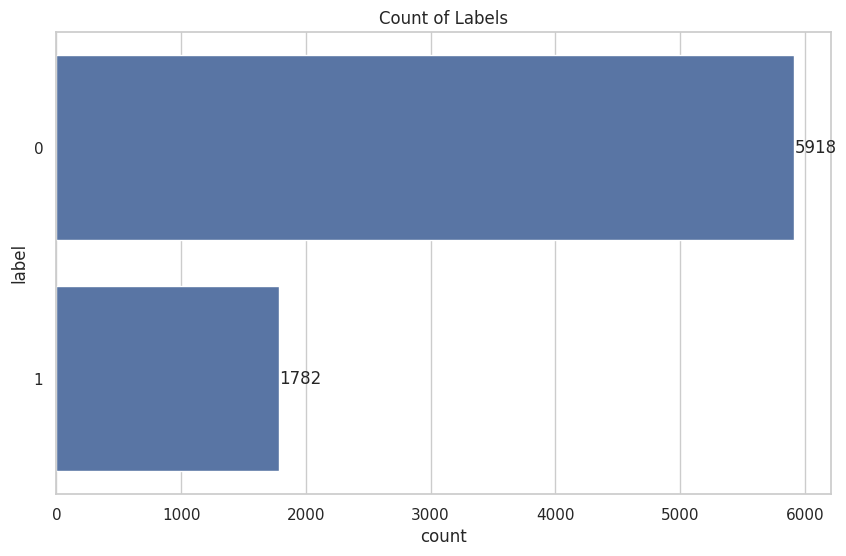

In [9]:
# Count of Labels, add number as well on each bar
if 'label' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df['label'], order=df['label'].value_counts().index)
    for p in plt.gca().patches:
        plt.gca().text(p.get_width() + 0.01, p.get_y() + p.get_height()/2.,
                       str(int(p.get_width())),
                       ha='left', va='center', fontsize=12)
    plt.title('Count of Labels')
    plt.show()

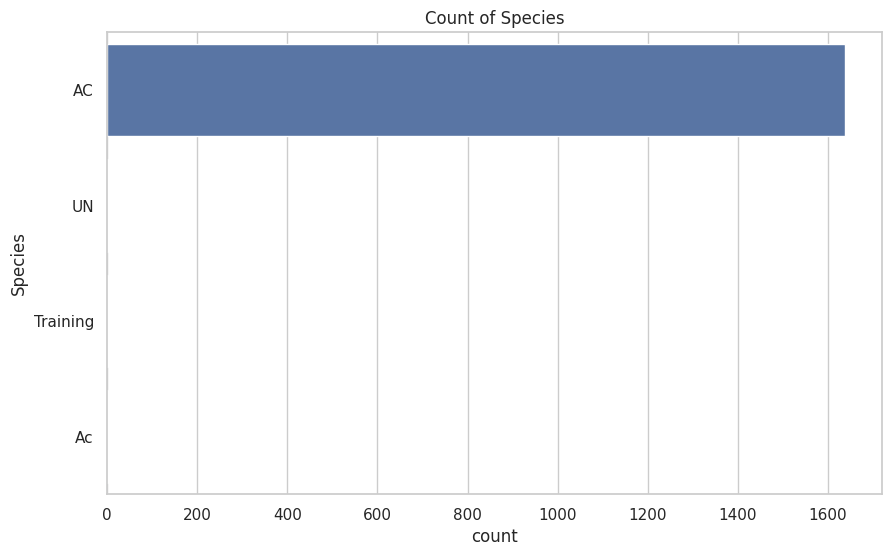

In [10]:
# Count of Species
if 'Species' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df['Species'], order=df['Species'].value_counts().index)
    plt.title('Count of Species')
    plt.show()

## Bivariate Analysis

In [11]:
# Remove 'species' column
df.drop(columns=['Species'], inplace=True)

In [12]:
df.shape

(7700, 7)

In [13]:
# analyze the null values
df_null = df.isnull().sum()
# analyze df_null regarding which categories are inside the null dataframe


In [14]:
df_null = df[df.isnull().any(axis=1)]
df_null.head()


,filename,call_length,begin_time,end_time,label,annotations_filename,s3_path
1209,NaN,NaN,NaN,NaN,1,FlumeL_m_23.03.11.Sounds.selections_DV.txt,NaN
1210,NaN,NaN,NaN,NaN,1,FlumeL_m_23.03.11.Sounds.selections_DV.txt,NaN
5477,ICLISTENHF1951_20240222T000009.000Z.wav,0.290698,197.8056,198.096298,1,ADupdate_ONC_2024_full_sounds.txt,NaN
5478,ICLISTENHF1951_20240222T010010.000Z.wav,0.290698,224.7930,225.083698,1,ADupdate_ONC_2024_full_sounds.txt,NaN
5479,ICLISTENHF1951_20240222T010010.000Z.wav,0.334302,227.7581,228.092402,1,ADupdate_ONC_2024_full_sounds.txt,NaN


In [15]:
df_null.shape

(56, 7)

In [16]:
# remove rows where s3_path is NaN
df = df.dropna(subset=['s3_path'])
# remove rows where call_length is more than 10 seconds
df = df[df['call_length'] <= 1]
# check max 5 call length

In [17]:
df_positive = df[df['label'] == 1]
df_negative = df[df['label'] == 0]

from soundbay.utils.metadata_processing import bg_from_non_overlap_calls
df_bg = bg_from_non_overlap_calls(df_positive)



In [18]:
df_bg.shape, df_negative.shape, df_positive.shape

((2537, 7), (5918, 7), (1723, 7))

In [19]:
all_df = pd.concat([df_bg, df_positive, df_negative])

In [ ]:
#check for every unique file in the all_df what it's sampling rate, if it's not 16Khz delete it from the df
files_location = '/home/ubuntu/soundbay/datasets/shaye_data_extended/'
import soundfile as sf
from tqdm import tqdm
all_df['sampling_rate'] = -1
unique_files = all_df['filename'].unique()
for index, row in tqdm(unique_files):
    try:
        file_path = files_location + row
        sampling_rate = sf.read(file_path)[1]
        all_df.loc[all_df['filename'] == row, 'sampling_rate'] = sampling_rate
    except:
        all_df.loc[all_df['filename'] == row, 'sampling_rate'] = -1



1117it [00:31, 23.88it/s]

In [23]:
sampling_rate[1]

16000

In [25]:

sorted_dfs = all_df.sort_values('begin_time', ascending=True)
newdf = bg_from_non_overlap_calls(sorted_dfs)

newdf['filename'] = newdf['filename'].apply(lambda x: x[:-4])
newdf['s3_path'] = newdf['s3_path'] + '/' + newdf['filename'] + '.wav'
newdf['filename'] = newdf['filename'].astype('str')
newdf['s3_path'] = newdf['s3_path'].astype('str')


group_labels = newdf.groupby('annotations_filename')['label'].agg(lambda x: x.mode()[0])

train_groups, test_groups = train_test_split(
    group_labels.index,
    stratify=group_labels.values,
    test_size=0.2,
    random_state=42
)

df_train = newdf[newdf['annotations_filename'].isin(train_groups)].reset_index(drop=True)
df_val = newdf[newdf['annotations_filename'].isin(test_groups)].reset_index(drop=True)

In [26]:
df_val.shape, df_train.shape
# save both to csv in /home/ubuntu/soundbay/datasets/shaye_dfs
df_train.to_csv('/home/ubuntu/soundbay/datasets/shaye_dfs/shaye_train_12_1_26.csv')
df_val.to_csv('/home/ubuntu/soundbay/datasets/shaye_dfs/shaye_val_12_1_26.csv')

In [23]:
query_file = '7205.221011053158'
df_query = df_train[df_train['filename'] == query_file]

In [24]:
df_query.shape

(3, 7)

In [37]:
df_query.iloc[1]

filename                                                7205.221011053158
call_length                                                      0.290698
begin_time                                                 1544951.559442
end_time                                                   1544951.850139
label                                                                   1
annotations_filename             ADupdate_22.09.22_WAV Shaye_manualTP.txt
s3_path                 s3://deepvoice-user-uploads/shayetudor@gmail.c...
Name: 6803, dtype: object